In [20]:
import time 
from selenium import webdriver
from bs4 import BeautifulSoup as soup
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

url = 'https://www.tokopedia.com/search?q=sepatu+adidas&source=universe&st=product&srp_component_id=02.02.02.01'
driver = webdriver.Chrome()
driver.get(url)

WebDriverWait(driver, 5).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, '#zeus-root')))
time.sleep(2)
for i in range(21):
    driver.execute_script('window.scrollBy(0, 250)')
    time.sleep(1)
    
driver.execute_script('window.scrollBy(50, 0)')
time.sleep(1)
soup1 = soup(driver.page_source, 'html.parser')

data = []
for item in soup1.findAll('div', class_='css-974ipl'):
    nama_produk = item.find('div', class_='prd_link-product-name css-3um8ox').text
    harga_produk = item.find('div', class_='prd_link-product-price css-1ksb19c').text

    rtg = item.findAll('span', class_='css-t70v7i')
    tjl = item.findAll('span', class_='css-1duhs3e')
    if len(rtg) > 0:
        terjual = item.find('span', class_='css-1duhs3e').text
    else:
        terjual = '-'

    for item2 in item.findAll('div', class_='css-1rn0irl'):
        lokasi = item2.findAll('span', class_='css-1kdc32b')[0].text
        
        data.append((nama_produk, harga_produk, terjual, lokasi))
toped = pd.DataFrame(data, columns=['Nama Barang', 'Harga', 'Terjual', 'Lokasi'])
toped.to_csv('C:/Users/bayuk/OneDrive/Documents/AI/pens/smtr2/Pemrosesan Data/12/toped.csv',index=False)
print('data telah tersimpan')
print(toped)
driver.close()

data telah tersimpan
                                          Nama Barang        Harga  \
0   Sepatu golf BOA adidas Solarmotion golf shoes ...  Rp4.299.000   
1   Sepatu Bola Adidas Copa Pure.4 FxG - Owhite GY...    Rp640.000   
2   Bayar ditempat/Sepatu Futsal Adidas Copa Best ...    Rp125.000   
3   Sepatu golf Adidas BOA Codechaos Boost Golf sh...  Rp4.899.000   
4   SEPATU ADIDAS SPEZIAL SAMBA GRADE ORIGINAL 100...    Rp179.000   
..                                                ...          ...   
75          Sepatu Adidas Alphabounce Instinct M Grey    Rp550.000   
76  Sepatu Lari Pria Adidas Ultrabounce White - HP...  Rp1.170.000   
77  Sepatu Adidas Ultra Boost 2020 ISS US National...    Rp480.000   
78  promo sepatu anak adidas kidz buat sekolah Tk/...     Rp80.746   
79          Sepatu Adidas forum 84 white navy - S, 40    Rp900.000   

          Terjual           Lokasi  
0               -  Jakarta Selatan  
1               -      Kab. Sleman  
2   Terjual 2 rb+   Kab. Ta

In [36]:
datatoped = pd.read_csv('C:/Users/bayuk/OneDrive/Documents/AI/pens/smtr2/Pemrosesan Data/12/toped.csv')
datatoped['Harga'] = datatoped['Harga'].str.replace('Rp', '')
datatoped['Harga'] = datatoped['Harga'].astype(float)
datatoped.head()

,Nama Barang,Harga,Terjual,Lokasi
0,Sepatu golf BOA adidas Solarmotion golf shoes ...,4299.0,-,Jakarta Selatan
1,Sepatu Bola Adidas Copa Pure.4 FxG - Owhite GY...,640.0,-,Kab. Sleman
2,Bayar ditempat/Sepatu Futsal Adidas Copa Best ...,125.0,Terjual 2 rb+,Kab. Tangerang
3,Sepatu golf Adidas BOA Codechaos Boost Golf sh...,4899.0,-,Jakarta Selatan
4,SEPATU ADIDAS SPEZIAL SAMBA GRADE ORIGINAL 100...,179.0,Terjual 500+,Kab. Tangerang


In [37]:
datashopee = pd.read_csv('C:/Users/bayuk/OneDrive/Documents/AI/pens/smtr2/Pemrosesan Data/12/shopee.csv')
datashopee = datashopee.fillna(0)
datashopee = datashopee.rename(columns={'ie3A+n':'Nama Barang', 'ZEgDH9':'Harga', 'r6HknA':'Terjual', 'zGGwiV':'Lokasi'})
datashopee

,col-xs-2-4 href,Nama Barang,vioxXd,Harga,Terjual,Lokasi
0,https://shopee.co.id/BRODO-Vulcan-Hi-Olive-OWS...,BRODO - Vulcan Hi Olive OWS,Rp448.000,295.000,33 Terjual,KOTA BANDUNG
1,https://shopee.co.id/Vans-Old-Skool-Classic-Na...,Vans Old Skool Classic Navy White - BNIB ORIGINAL,Rp700.000,499.000,5 Terjual,KAB. SLEMAN
2,https://shopee.co.id/SEPATU-VANS-OLD-SKOOL-CLA...,SEPATU VANS OLD SKOOL CLASSIC BLACK WHITE RESM...,Rp1.100.000,999.999,1 Terjual,KAB. SLEMAN
3,https://shopee.co.id/GIFLY-Mijin-Sneakers-Wani...,GIFLY Mijin Sneakers Wanita Sepatu Sport Shoes...,Rp499.000,169.000,288 Terjual,KAB. TANGERANG
4,https://shopee.co.id/SEPATU-ADIDAS-GRAND-COURT...,SEPATU ADIDAS GRAND COURT SE FULLWHITE ORIGINA...,0,280.000,126 Terjual,KOTA TANGERANG SELATAN
5,https://shopee.co.id/BRODO-X-Dian-Sastro-Sneak...,BRODO X Dian Sastro - Sneakers VTG V2 Wanita C...,Rp549.000,494.000,56 Terjual,KOTA BANDUNG
6,https://shopee.co.id/BRODO-Sneakers-VTG-V2-Hi-...,BRODO - Sneakers VTG V2 Hi Limestone Grey IS,Rp688.000,429.000,86 Terjual,KOTA BANDUNG
7,https://shopee.co.id/Adidas-TENNIS-Grand-Court...,Adidas TENNIS Grand Court SE Shoes Pria Putih ...,Rp1.100.000,495.000,3 Terjual,KOTA YOGYAKARTA
8,https://shopee.co.id/Adidas-TENNIS-Sepatu-Cour...,Adidas TENNIS Sepatu Court Lifestyle Vegan Nov...,Rp1.100.000,407.000,9 Terjual,KOTA YOGYAKARTA
9,https://shopee.co.id/ADIDAS-TENNIS-H02062-GRAN...,ADIDAS TENNIS H02062 GRAND COURT,0,540.750,4 Terjual,KOTA SURABAYA


In [38]:
# perbandingan harga
print('Tokopedia'.center(27, '='))
print(f"Harga tertinggi\t: Rp{round(max(datatoped['Harga']))}.000")
print(f"Harga terendah\t: Rp{round(min(datatoped['Harga']))}.000\n")
print('Shopee'.center(27, '='))
print(f"Harga tertinggi\t: Rp{round(max(datashopee['Harga']))}.000")
print(f"Harga terendah\t: Rp{round(min(datashopee['Harga']))}.000")

=========Tokopedia=========
Harga tertinggi	: Rp4899.000
Harga terendah	: Rp25.000

===========Shopee==========
Harga tertinggi	: Rp1000.000
Harga terendah	: Rp169.000


Mean harga sepatu adidas di Tokopedia adalah Rp949.000


<Axes: ylabel='Frequency'>

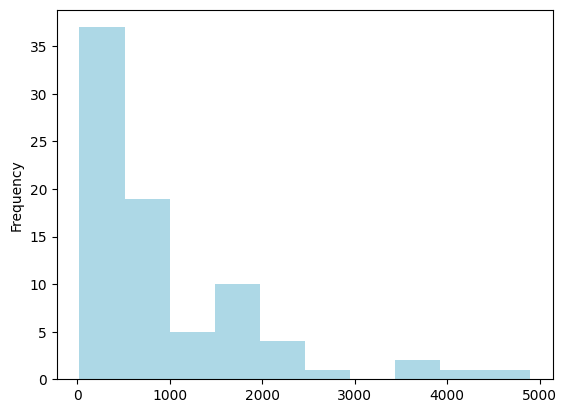

In [40]:
meantoped = datatoped['Harga'].mean()
print(f"Mean harga sepatu adidas di Tokopedia adalah Rp{round(meantoped)}.000")
datatoped['Harga'].plot.hist(color = 'lightblue')

Mean harga sepatu adidas di Shopee adalah Rp493.000


<Axes: ylabel='Frequency'>

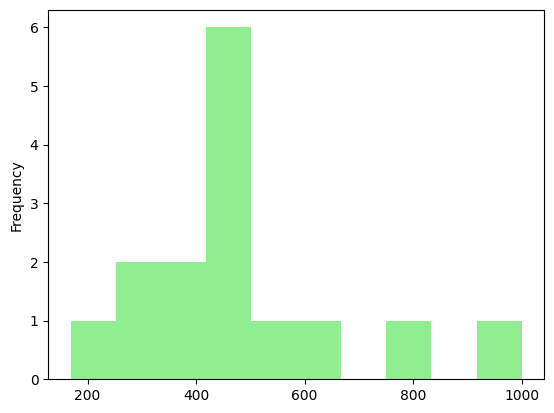

In [41]:
meanshopee = datashopee['Harga'].mean()
print(f"Mean harga sepatu adidas di Shopee adalah Rp{round(meanshopee)}.000")
datashopee['Harga'].plot.hist(color = 'lightgreen')

In [42]:
# membandingkan harga dengan mean
if meantoped > meanshopee:
    print('Harga di Shopee lebih murah')
elif meantoped < meanshopee:
    print('Harga di Tokopedia lebih murah')
else:
    print('Harga di kedua market place sama')

Harga di Shopee lebih murah


In [45]:
# kesesuaian kata kunci
keyword_count = datatoped['Nama Barang'].str.contains('Adidas').sum()
print('Kata kunci muncul pada Tokopedia sebanyak ', keyword_count, 'kali')
keyword_count2 = datashopee['Nama Barang'].str.contains('Adidas').sum()
print('Kata kunci muncul pada Tokopedia sebanyak ', keyword_count2, 'kali')

Kata kunci muncul pada Tokopedia sebanyak  53 kali
Kata kunci muncul pada Tokopedia sebanyak  4 kali
